In [14]:
import rosbag
import cv2
from cv_bridge import CvBridge
from sensor_msgs.msg import Image
bridge = CvBridge()
import numpy as np
from matplotlib import pyplot as plt
from tubaf_tools import array_to_pose, pose_to_array
from geometry_msgs.msg import PoseStamped as PoseStamped

In [27]:
# http://wiki.ros.org/rosbag/Cookbook#Get_summary_information_about_a_bag
bag = rosbag.Bag('/home/grehl/bags/henkel.bag')
topics = bag.get_type_and_topic_info()[1].keys()
types = []
for i in range(0,len(bag.get_type_and_topic_info()[1].values())):
    types.append(bag.get_type_and_topic_info()[1].values()[i][0])

In [4]:
def show_depth(cv_image, title="test"):
    real_min = np.min(cv_image[np.nonzero(cv_image)])
    cv_image[cv_image==0] = real_min
    cv_image = np.abs(cv_image - np.max(cv_image))
    cv_image_array = np.array(cv_image, dtype = np.dtype('f8'))
    cv_image_norm = cv2.normalize(cv_image_array, cv_image_array, 0.1, 0.9, cv2.NORM_MINMAX)
    cv2.imshow(title, cv_image_norm)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

pose/estimated
pose/sensed
sensed_pose_confidence: 0.999481022358
[ 3.3148431  -0.16027155  9.4371281 ]
[-0.00097563  0.02888732]
0.028903789666788547


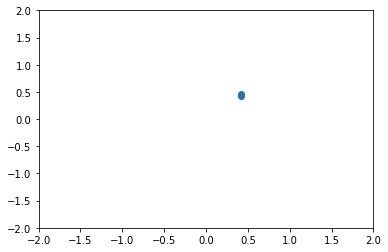

In [40]:
for topic, msg, t in bag.read_messages(topics):
    if "pose/" in topic:
        if "estimate" in topic:
            print topic
            est_ps = msg
        if "sense" in topic:
            print topic
            sen_ps = msg
    if "confidence" in topic:
        print topic + ": " + str(msg.data)
est = pose_to_array(est_ps.pose)
sen = pose_to_array(sen_ps.pose)

est_xy = np.array([est[0,3], est[1,3]])
sen_xy = np.array([sen[0,3], sen[1,3]])

from scipy.spatial.transform import Rotation as R

est_w = R.from_dcm(est[:3, :3]).as_euler('xyz', degrees=True)
sen_w = R.from_dcm(sen[:3, :3]).as_euler('xyz', degrees=True)

a = est_w - sen_w
a = (a + 180) % 360 - 180
print a
print est_xy - sen_xy
print np.linalg.norm(est_xy -sen_xy)
plt.figure()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot([est[0,3], sen[0,3]],[est[1,3], sen[1,3]], "o")

In [49]:
for topic, msg, t in bag.read_messages(topics):
    if "sense" in topic:
        print topic
        print msg
#     if "attempts" in topic:
#         print("%s: %i" % (topic, msg.data))
#     if "planning_time" in topic:
#         print("%s: %i" % (topic, msg.data))
#     if "planner" in topic:
#         print("%s: %s" % (topic, msg.data.split("kConfig")[0]))
#     if "timing" in topic:
#         print("%s: %i" % (topic, msg.data))
        
#     if "trajectory" in topic:
#         print(topic)
#         p_trj = None
#         v_trj = None
#         a_trj = None
#         e_trj = None
#         t = None
#         leg = []
#         for k in msg.joint_trajectory.joint_names:
#             leg.append(k.split("ur5_")[-1].split("_joint")[0])
#         leg[0] = "base"
#         leg[1] = "shoulder"
#         for point in msg.joint_trajectory.points:
#             if p_trj is None:
#                 p_trj = [point.positions]
#                 v_trj = [point.velocities]
#                 a_trj = [point.accelerations]
#                 e_trj = [point.effort]
#                 t = [point.time_from_start.to_sec()]
#             else:
#                 p_trj = np.vstack([p_trj, point.positions])
#                 v_trj = np.vstack([v_trj, point.velocities])
#                 a_trj = np.vstack([a_trj, point.accelerations])
#                 e_trj = np.vstack([e_trj, point.effort])
#                 t = np.vstack([t, point.time_from_start.to_sec()])
#         for y in range(len(p_trj[0])):
#             plt.plot(t, np.rad2deg(p_trj[:, y]), color=mpl.cm.viridis.colors[y*50])
#         plt.title("Position "+topic.split("/")[-1])
#         plt.xlabel('Zeit seit Start [s]')
#         plt.ylabel('Gelenkwinkel [deg]')
#         plt.legend(leg, bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.show()
        
#         for y in range(len(v_trj[0])):
#             plt.plot(t, np.rad2deg(v_trj[:, y]), color=mpl.cm.viridis.colors[y*50])
#         plt.title("Geschwindigkeit "+topic.split("/")[-1])
#         plt.xlabel('Zeit seit Start [s]')
#         plt.ylabel('Winkelgeschwindigkeit [deg/s]')
#         plt.legend(leg, bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.show()
    
#         for y in range(len(a_trj[0])):
#             plt.plot(t, np.rad2deg(a_trj[:, y]), color=mpl.cm.viridis.colors[y*50])
#         plt.title("Beschleunigung "+topic.split("/")[-1])
#         plt.xlabel('Zeit seit Start [s]')
#         plt.ylabel('Winkelbeschleunigung [deg/s^2]')
#         plt.legend(leg, bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.show()

#     if "rgb" in topic:
#         print topic
#         image = bridge.imgmsg_to_cv2(msg, "bgra8")
#         cv2.imshow("test", image)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
#     if "depth" in topic:
#         print topic
#         # https://stackoverflow.com/questions/47751323/get-depth-image-in-grayscale-in-ros-with-imgmsg-to-cv2-python
#         show_depth(bridge.imgmsg_to_cv2(msg, "16UC1"), topic.split("/")[-1])
    

pose/sensed
header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: "gripper_ur5_base_link"
pose: 
  position: 
    x: 0.419507274505
    y: 0.42385016827
    z: -0.517
  orientation: 
    x: 0.00976747820654
    y: -0.0210377849589
    z: 0.994825902378
    w: -0.0989112325825
sensed_pose_confidence
data: 0.999481022358
sense/planes
header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
tables: []
sense/floor
header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
pose: 
  position: 
    x: 0.0
    y: 0.0
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 0.0
convex_hull: []
sense/obstacles
markers: []
sense/ps
header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
pose: 
  position: 
    x: 0.0
    y: 0.0
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 0.0


In [21]:
np.rad2deg(1.5708)

90.00021045914971

In [152]:
not 0

True

In [160]:
"sdf".split("a")

['sdf']

In [158]:
import string



'a;b'